In [1]:
dir_root = '.'
# If using google colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive/')
    dir_root = '/content/drive/MyDrive/Colab Notebooks/ESE546/hw3'

print(dir_root)

.


In [2]:
import requests

# Load the text from a local file
def load_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Load the text from a URL
def load_text_from_url(url):
    response = requests.get(url)
    text = response.text.replace('\r\n', '\n')  # Normalize line endings
    return text

# Count unique characters in the text
def count_unique_chars(text):
    unique_chars = set(text)
    # Num of unique characters
    vocab_size = len(unique_chars)
    return vocab_size, unique_chars

# List of file paths or URLs
local_file_1 = 'pg100.txt'
local_file_2 = 'pg2600.txt'
local_file_3 = 'pg766.txt'
url_file_1 = 'https://www.gutenberg.org/cache/epub/100/pg100.txt'
url_file_2 = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
url_file_3 = 'https://www.gutenberg.org/cache/epub/766/pg766.txt'

if 'google.colab' in str(get_ipython()):
    file_path_list = [url_file_1, url_file_2, url_file_3]
else:
    file_path_list = [local_file_1, local_file_2, local_file_3]
text_list = []
vocab_size_list = []
unique_chars_list = []

for file_path in file_path_list:
    if file_path.startswith('http'):
        print(f'Loading text from URL: {file_path}')
        text = load_text_from_url(file_path)
    else:
        print(f'Loading text from file: {file_path}')
        text = load_text_from_file(file_path)
    vocab_size, unique_chars = count_unique_chars(text)
    text_list.append(text)
    vocab_size_list.append(vocab_size)
    unique_chars_list.append(unique_chars)

print(f'Vocabulary size for each text: {vocab_size_list}')
print(f'Unique characters for each text: {unique_chars_list}')

Loading text from file: pg100.txt
Loading text from file: pg2600.txt
Loading text from file: pg766.txt
Vocabulary size for each text: [107, 112, 90]
Unique characters for each text: [{'%', '(', 'â', 'G', 'g', 'z', ')', 'v', '\t', 'I', 'é', 'ç', '\n', 'H', ' ', '$', 'R', 'F', '#', 'M', '—', '1', 'A', 'à', 'À', ']', '2', 'a', 'f', 'b', '”', 'k', '.', 'C', 'd', 'q', '\ufeff', 'ë', 'u', '’', 'j', 'T', '!', 'K', 'Q', 'è', 'y', 'œ', '™', 'Y', '&', 'r', 'S', '[', 'î', '8', '•', '*', '4', 'V', 'o', 'P', 'n', 'O', ',', ':', 'X', 'ê', 'U', '“', 'L', 'w', '0', 'N', 'Æ', '_', 'B', 'J', '/', '3', '6', 'É', 'h', '7', 'x', '…', '9', '-', 'E', 'e', 'm', 'p', 'Ç', 'l', '‘', '?', 'c', 'Z', 's', 'æ', 'D', 'W', "'", ';', 't', 'i', '5'}, {'ö', '%', 'ä', '(', 'ï', 'â', 'G', 'g', 'z', 'ý', ')', 'v', 'I', 'é', 'ç', 'í', '\n', 'H', ' ', '$', 'R', 'F', 'M', '#', '—', '=', '1', 'ô', 'ó', 'A', 'à', 'À', ']', '2', 'a', 'ú', 'f', 'b', '”', 'k', '.', 'C', 'd', 'q', '\ufeff', 'ë', 'Á', 'u', '’', 'j', 'T', '!', 'K', '

In [3]:
print(text_list[0][:100])
print(text_list[1][:100])
print(text_list[2][:100])

The Project Gutenberg eBook of The Complete Works of William Shakespeare
    
This ebook is for the
﻿The Project Gutenberg eBook of War and Peace
    
This ebook is for the use of anyone anywhere in t
﻿The Project Gutenberg eBook of David Copperfield
    
This ebook is for the use of anyone anywhere 


In [4]:
# # Compare unique characters from local and URL text files
# local_file_path = 'pg2600.txt'
# url_file_path = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
#
# local_text = load_text_from_file(local_file_path)
# local_vocab_size, local_unique_chars = count_unique_chars(local_text)
# url_text = load_text_from_url(url_file_path)
# url_vocab_size, url_unique_chars = count_unique_chars(url_text)
#
# # Find the extra character(s)
# extra_chars_in_url = url_unique_chars - local_unique_chars
# extra_chars_in_local = local_unique_chars - url_unique_chars
# print(f'Extra characters in URL text: {extra_chars_in_url}')
# print(f'Extra characters in local text: {extra_chars_in_local}')

In [5]:
# Create a dictionary to map characters to indices and vice-versa
def create_char_mappings(unique_chars):
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    index_to_char = {idx: char for idx, char in enumerate(unique_chars)}
    return char_to_index, index_to_char

vocab_size, unique_chars = vocab_size_list[0], unique_chars_list[0]
char_to_index, index_to_char = create_char_mappings(unique_chars)

print(f"Character to index mapping for first text: {char_to_index}")
print(f"Index to character mapping for first text: {index_to_char}")

Character to index mapping for first text: {'%': 0, '(': 1, 'â': 2, 'G': 3, 'g': 4, 'z': 5, ')': 6, 'v': 7, '\t': 8, 'I': 9, 'é': 10, 'ç': 11, '\n': 12, 'H': 13, ' ': 14, '$': 15, 'R': 16, 'F': 17, '#': 18, 'M': 19, '—': 20, '1': 21, 'A': 22, 'à': 23, 'À': 24, ']': 25, '2': 26, 'a': 27, 'f': 28, 'b': 29, '”': 30, 'k': 31, '.': 32, 'C': 33, 'd': 34, 'q': 35, '\ufeff': 36, 'ë': 37, 'u': 38, '’': 39, 'j': 40, 'T': 41, '!': 42, 'K': 43, 'Q': 44, 'è': 45, 'y': 46, 'œ': 47, '™': 48, 'Y': 49, '&': 50, 'r': 51, 'S': 52, '[': 53, 'î': 54, '8': 55, '•': 56, '*': 57, '4': 58, 'V': 59, 'o': 60, 'P': 61, 'n': 62, 'O': 63, ',': 64, ':': 65, 'X': 66, 'ê': 67, 'U': 68, '“': 69, 'L': 70, 'w': 71, '0': 72, 'N': 73, 'Æ': 74, '_': 75, 'B': 76, 'J': 77, '/': 78, '3': 79, '6': 80, 'É': 81, 'h': 82, '7': 83, 'x': 84, '…': 85, '9': 86, '-': 87, 'E': 88, 'e': 89, 'm': 90, 'p': 91, 'Ç': 92, 'l': 93, '‘': 94, '?': 95, 'c': 96, 'Z': 97, 's': 98, 'æ': 99, 'D': 100, 'W': 101, "'": 102, ';': 103, 't': 104, 'i': 105,

In [6]:
import numpy as np

# One-hot encode a character based on the character index
def one_hot_encode(char, char_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[char_to_index[char]] = 1
    return one_hot_vector

test_char_a = 'a'
one_hot_vector = one_hot_encode(test_char_a, char_to_index, vocab_size)
print(f"One-hot encoding for '{test_char_a}': {one_hot_vector}")

One-hot encoding for 'a': [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# Sample a short portion from the first book
sample_text_500 = text_list[0][60000:60500]
print(sample_text_500)

 ill:
Some in their hawks and hounds, some in their horse.
And every humour hath his adjunct pleasure,
Wherein it finds a joy above the rest,
But these particulars are not my measure,
All these I better in one general best.
Thy love is better than high birth to me,
Richer than wealth, prouder than garments’ costs,
Of more delight than hawks and horses be:
And having thee, of all men’s pride I boast.
  Wretched in this alone, that thou mayst take,
  All this away, and me most wretched make.


   


In [8]:
from tqdm import tqdm

# # Generate sequences of 32 characters and the next character as the target
# def generate_sequences(text, char_to_index, sequence_length=32, stride=1):
#     input_sequences = []
#     target_characters = []

#     # for i in range(0, len(text) - sequence_length, stride):
#     for i in tqdm(range(0, len(text) - sequence_length - 1, stride), desc="Generating sequences"):
#         input_seq = text[i:i+sequence_length]
#         # Target/next character
#         target_char = text[i+sequence_length]

#         # Convert input sequence to one-hot encoded vectors
#         input_seq_encoded = [one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq]
#         input_sequences.append(input_seq_encoded)

#         # One-hot encoding for the target character
#         target_char_encoded = one_hot_encode(target_char, char_to_index, len(char_to_index))
#         target_characters.append(target_char_encoded)

#     return np.array(input_sequences), np.array(target_characters)

# Generate sequences of 32 characters and the next 32 after stride length as the target
def generate_sequences(
    text, char_to_index, input_seq_len=32, target_seq_len=32, stride=16, target_offset=1
):
    input_sequences = []
    target_sequences = []

    prevent_index_overflow = max(input_seq_len, target_seq_len + target_offset)

    for i in tqdm(range(0, len(text) - prevent_index_overflow, stride), desc="Generating sequences"):
        input_seq = text[i : i + input_seq_len]
        target_seq = text[i + target_offset : i + target_seq_len + target_offset]

        # Convert to one-hot encoded vectors
        input_seq_encoded = [
            one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq
        ]
        target_seq_encoded = [
            one_hot_encode(c, char_to_index, len(char_to_index)) for c in target_seq
        ]

        input_sequences.append(input_seq_encoded)
        target_sequences.append(target_seq_encoded)

    return np.array(input_sequences), np.array(target_sequences)

In [9]:
input_seqs, target_seqs = generate_sequences(sample_text_500, char_to_index, input_seq_len=32, target_seq_len=32, stride=2)
print(f"Input sequences shape: {input_seqs.shape}")
print(f"Target characters shape: {target_seqs.shape}")

# randomly pick a sample input and target sequence
idx = np.random.randint(0, input_seqs.shape[0])
sample_input_seq = input_seqs[idx]
sample_target_seq = target_seqs[idx]
print(sample_input_seq)
print(sample_target_seq)
# print the sequence mapped to characters
print(">Sample input sequence:")
print(''.join([index_to_char[np.argmax(char)] for char in sample_input_seq]))
print(">Sample target sequence:")
print(''.join([index_to_char[np.argmax(char)] for char in sample_target_seq]))

Generating sequences:   0%|          | 0/233 [00:00<?, ?it/s]

Generating sequences: 100%|██████████| 233/233 [00:00<00:00, 17454.11it/s]

Input sequences shape: (233, 32, 107)
Target characters shape: (233, 32, 107)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
>Sample input sequence:
,
Of more delight than hawks and
>Sample target sequence:
Of more delight than hawks and h


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Device: {device}")

class CharRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, rnn_layers=1, device=device, dropout=0.2):
        super(CharRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.rnn_layers = rnn_layers
        self.device = device
        self.dropout = dropout

        self.rnn = nn.RNN(self.input_size, self.hidden_size, num_layers=self.rnn_layers, nonlinearity='tanh', batch_first=True)
        self.dropout = nn.Dropout(self.dropout)
        self.fc = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x, hidden):
        # batch_size = x.size(0)
        # hidden = self.init_hidden(batch_size)
        # hidden = hidden.to(self.device)

        out, hidden = self.rnn(x, hidden)
        out = out.contiguous()#.view(-1, self.hidden_size)
        out = self.dropout(out)
        out = self.fc(out)
        # return F.log_softmax(out, dim=1), hidden
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.rnn_layers, batch_size, self.hidden_size).to(device)

def repackage_hidden(hidden_layer):
    # Detach hidden states from their history
    if isinstance(hidden_layer, torch.Tensor):
        return hidden_layer.detach()
    else:
        return tuple(repackage_hidden(v) for v in hidden_layer)


Device: cuda


In [11]:
USE_ALL_BOOKS = False

if 'google.colab' in str(get_ipython()):
    USE_ALL_BOOKS = True

sequence_length = 32
stride = 1

if USE_ALL_BOOKS:
    # Load text and prepare data
    all_texts = ''.join(text_list)  # Concatenate all texts
    # Pick the first 1/30, mid 1/30, and last 1/30 for training
    all_texts = all_texts[:len(all_texts)//30]
    all_texts += all_texts[len(all_texts)//2:len(all_texts)//2 + len(all_texts)//30]
    all_texts += all_texts[len(all_texts)//2 + len(all_texts)//30:]
    vocab_size, unique_chars = count_unique_chars(all_texts)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    input_seqs, target_seqs = generate_sequences(all_texts, char_to_index, input_seq_len=sequence_length, target_seq_len=sequence_length, stride=stride)
else:
    text = text_list[0]
    # sample only the first 1/100 of the text
    text = text[:len(text)//100]
    vocab_size, unique_chars = count_unique_chars(text)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    input_seqs, target_seqs = generate_sequences(text, char_to_index, input_seq_len=sequence_length, target_seq_len=sequence_length, stride=stride)

input_seqs = torch.tensor(input_seqs, dtype=torch.float32).to(device)
target_seqs = torch.tensor(target_seqs, dtype=torch.long).to(device)
    
dataset = TensorDataset(input_seqs, target_seqs)
train_size = int(0.8 * len(dataset))
train_dataset = TensorDataset(input_seqs[:train_size], target_seqs[:train_size])
val_dataset = TensorDataset(input_seqs[train_size:], target_seqs[train_size:])
    
print("Input seqs shape:", input_seqs.shape)
print("Target seqs shape:", target_seqs.shape)


Vocabulary size: 79


Generating sequences: 100%|██████████| 53753/53753 [00:02<00:00, 18046.35it/s]


Input seqs shape: torch.Size([53753, 32, 79])
Target seqs shape: torch.Size([53753, 32, 79])


In [12]:
def escape_sequence(seq):
    return seq.replace(' ', '\\s').replace('\n', '\\n')

# Randomly pick a sequence and target sequence
# convert them back to characters
# and check if the conversion is correct
sequence_idx = np.random.randint(0, len(input_seqs))
input_seq = input_seqs[sequence_idx]
target_seq = target_seqs[sequence_idx]

input_indices = torch.argmax(input_seq, dim=1).cpu().numpy()
input_chars = [index_to_char[idx] for idx in input_indices]
target_indices = torch.argmax(target_seq, dim=1).cpu().numpy()
target_chars = [index_to_char[idx] for idx in target_indices]

input_str = ''.join(input_chars)
target_str = ''.join(target_chars)
escaped_input_str = escape_sequence(input_str)
escaped_target_str = escape_sequence(target_str)

print(f">Input seq: \n{escaped_input_str}")
print(f">Target seq: \n{escaped_target_str}")

# Also find the sequence in the original txt ebooks
# and print the entire sequence with the next target character
for book_idx, text in enumerate(text_list):
    input_start_indices = [i for i in range(len(text)) if text.startswith(input_str, i)]
    for input_start_idx in input_start_indices:
        # Make sure the sequence is not at the end of the text
        if input_start_idx + len(input_str) + len(target_str) < len(text):
            # Extract the sequence and the next character
            excerpt = text[input_start_idx:input_start_idx + max(len(input_str), len(target_str) + stride)]
            escaped_excerpt = escape_sequence(excerpt)
            print(f">Found the sequence in book {book_idx + 1}, original complete sequence:")
            print(f"{escaped_excerpt}")

TypeError: argmax(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [13]:
from IPython.display import clear_output
import torch.optim.lr_scheduler as lr_scheduler

# Hyperparameters
hidden_size = 512
learning_rate = 0.001
dropout = 0.5
num_epochs = 100 if 'google.colab' in str(get_ipython()) else 20
batch_size = 64
rnn_layers = 1

from torch.utils.data import DataLoader, RandomSampler, BatchSampler

# Create samplers that allow replacement to ensure each batch has the same size
train_sampler = RandomSampler(train_dataset, replacement=True, num_samples=len(train_dataset))
val_sampler = RandomSampler(val_dataset, replacement=True, num_samples=len(val_dataset))

# Create batch samplers with the same batch size and drop the last batch
train_batch_sampler = BatchSampler(train_sampler, batch_size=batch_size, drop_last=True)
val_batch_sampler = BatchSampler(val_sampler, batch_size=batch_size, drop_last=True)

# Create DataLoader instances
train_loader = DataLoader(dataset=train_dataset, batch_sampler=train_batch_sampler)
val_loader = DataLoader(dataset=val_dataset, batch_sampler=val_batch_sampler)

In [14]:
# Initialize model, loss function, and optimizer
model = CharRNN(vocab_size, vocab_size, hidden_size, rnn_layers, device=device, dropout=dropout).to(device)
# criterion = nn.NLLLoss().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Adjust gamma as needed

training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []
update_counts = []
update_cnt = 0

# Training loop
for epoch in tqdm(range(num_epochs), desc="Training"):
    total_loss = 0
    hidden = model.init_hidden(batch_size).to(device)
    for input_seqs, target_seqs in train_loader:
        model.train()
        batch_size = input_seqs.size(0)
        input_seqs, target_seqs = input_seqs.to(device), target_seqs.to(device)
        
        optimizer.zero_grad()
        hidden = repackage_hidden(hidden)
        output, hidden = model(input_seqs, hidden)
        loss = criterion(output.transpose(1, 2), torch.argmax(target_seqs, dim=2))
        loss.backward(retain_graph=True)
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        total_loss += loss.item()

        # Record training loss and accuracy every 100 updates
        if update_cnt % 100 == 0:
            training_losses.append(loss.item())
            update_counts.append(update_cnt)

            training_accuracy = (torch.argmax(output[:, -1, :], dim=1) == torch.argmax(target_seqs[:, -1, :], dim=1)).float().mean().item()
            training_accuracies.append(training_accuracy)

        if update_cnt % 1000 == 0:
            # Validation
            model.eval()
            with torch.no_grad():
                val_loss = 0
                correct_predictions = 0
                total_predictions = 0
                for input_seqs, target_seqs in val_loader:
                    batch_size = input_seqs.size(0)
                    input_seqs, target_seqs = input_seqs.to(device), target_seqs.to(device)
                    hidden = model.init_hidden(batch_size).to(device)
                    hidden = repackage_hidden(hidden)
                    output, hidden = model(input_seqs, hidden)
                    val_loss += criterion(output.transpose(1, 2), torch.argmax(target_seqs, dim=2)).item()
                    
                    correct_predictions += (torch.argmax(output[:, -1, :], dim=1) == torch.argmax(target_seqs[:, -1, :], dim=1)).sum().item()
                    total_predictions += target_seqs.size(0)

            avg_val_loss = val_loss / len(val_loader)
            validation_losses.append(avg_val_loss)
            validation_accuracy = correct_predictions / total_predictions
            validation_accuracies.append(validation_accuracy)
        
            print(f'Update {update_cnt}, Training Loss: {loss}, Training Accuracy: {training_accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}')

        update_cnt += 1
    
    scheduler.step()
    

Training:   0%|          | 0/20 [00:00<?, ?it/s]

Update 0, Training Loss: 4.387058734893799, Training Accuracy: 0.0000, Validation Loss: 4.3048, Validation Accuracy: 0.1971


Training:   5%|▌         | 1/20 [00:04<01:28,  4.63s/it]

Update 1000, Training Loss: 2.035681962966919, Training Accuracy: 0.4531, Validation Loss: 2.0051, Validation Accuracy: 0.4210


Training:  15%|█▌        | 3/20 [00:13<01:14,  4.36s/it]

Update 2000, Training Loss: 1.6375820636749268, Training Accuracy: 0.5625, Validation Loss: 1.9947, Validation Accuracy: 0.4299


Training:  20%|██        | 4/20 [00:16<01:05,  4.11s/it]

Update 3000, Training Loss: 1.5256078243255615, Training Accuracy: 0.7188, Validation Loss: 2.0635, Validation Accuracy: 0.4222


Training:  30%|███       | 6/20 [00:25<00:59,  4.24s/it]

Update 4000, Training Loss: 1.3631848096847534, Training Accuracy: 0.7500, Validation Loss: 2.1570, Validation Accuracy: 0.4205


Training:  35%|███▌      | 7/20 [00:29<00:53,  4.14s/it]

Update 5000, Training Loss: 1.2294031381607056, Training Accuracy: 0.8594, Validation Loss: 2.2053, Validation Accuracy: 0.4174


Training:  40%|████      | 8/20 [00:33<00:50,  4.19s/it]

Update 6000, Training Loss: 1.153340220451355, Training Accuracy: 0.8438, Validation Loss: 2.2455, Validation Accuracy: 0.4169


Training:  50%|█████     | 10/20 [00:41<00:40,  4.09s/it]

Update 7000, Training Loss: 1.1304265260696411, Training Accuracy: 0.8750, Validation Loss: 2.2877, Validation Accuracy: 0.4069


Training:  55%|█████▌    | 11/20 [00:46<00:37,  4.12s/it]

Update 8000, Training Loss: 1.0875108242034912, Training Accuracy: 0.9375, Validation Loss: 2.2866, Validation Accuracy: 0.4102


Training:  65%|██████▌   | 13/20 [00:54<00:28,  4.09s/it]

Update 9000, Training Loss: 1.02637779712677, Training Accuracy: 0.8438, Validation Loss: 2.3019, Validation Accuracy: 0.4251


Training:  70%|███████   | 14/20 [00:58<00:25,  4.18s/it]

Update 10000, Training Loss: 1.008704423904419, Training Accuracy: 0.9219, Validation Loss: 2.2962, Validation Accuracy: 0.4182


Training:  80%|████████  | 16/20 [01:07<00:16,  4.16s/it]

Update 11000, Training Loss: 0.9683035016059875, Training Accuracy: 0.9531, Validation Loss: 2.3134, Validation Accuracy: 0.4193


Training:  85%|████████▌ | 17/20 [01:11<00:12,  4.29s/it]

Update 12000, Training Loss: 0.9409401416778564, Training Accuracy: 0.9375, Validation Loss: 2.3116, Validation Accuracy: 0.4200


Training:  95%|█████████▌| 19/20 [01:19<00:04,  4.21s/it]

Update 13000, Training Loss: 0.9438182711601257, Training Accuracy: 0.9688, Validation Loss: 2.3101, Validation Accuracy: 0.4295


Training: 100%|██████████| 20/20 [01:24<00:00,  4.21s/it]


In [15]:
temp_test_input = np.array([73, 62, 66, 67, 20, 41, 58, 51, 61, 73, 56, 66, 67, 62, 66, 67, 61, 73, 61, 67, 64, 72,  8, 37, 62, 52, 72, 45, 73, 40, 67, 73])
temp_test_target = np.array([62, 66, 67, 20, 41, 58, 51, 61, 73, 56, 66, 67, 62, 66, 67, 61, 73, 61, 67, 64, 72,  8, 37, 62, 52, 72, 45, 73, 40, 67, 73, 62])
temp_test_input_char = []
temp_test_target_char = []
for i in range(len(temp_test_input)):
  temp_test_input_char.append(index_to_char[temp_test_input[i]])
for i in range(len(temp_test_target)):
  temp_test_target_char.append(index_to_char[temp_test_target[i]])
print(">Input:")
print(''.join(temp_test_input_char))
print(">Target:")
print(''.join(temp_test_target_char))

['b', 'B', '*', 'c', 'Y', 'e', 'N', 'a', ')', 'b', '#', '*', 'c', 'B', '*', 'c', ')', 'b', ')', 'c', 'f', 'j', ',', ';', 'B', 'n', 'j', 't', 'b', '(', 'c', 'b']
['B', '*', 'c', 'Y', 'e', 'N', 'a', ')', 'b', '#', '*', 'c', 'B', '*', 'c', ')', 'b', ')', 'c', 'f', 'j', ',', ';', 'B', 'n', 'j', 't', 'b', '(', 'c', 'b', 'B']


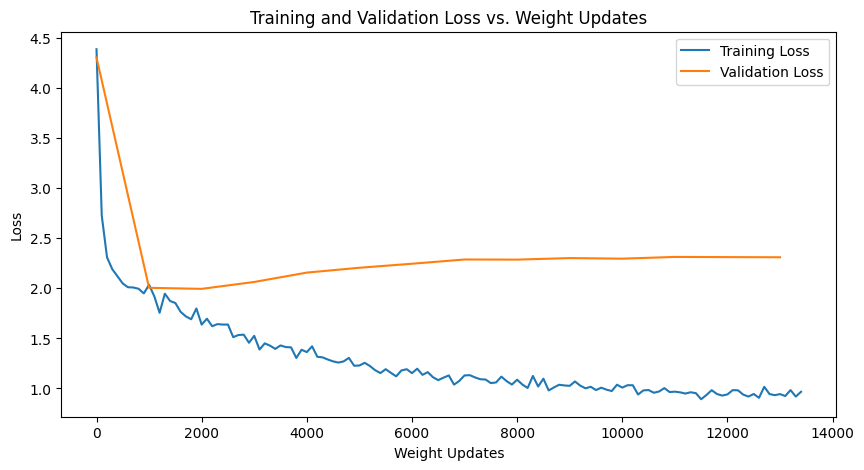

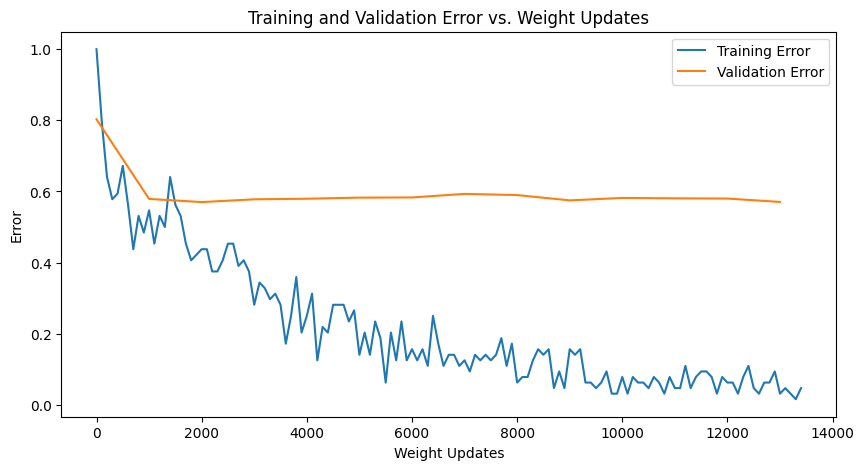

In [23]:
import matplotlib.pyplot as plt

# Save the accuracies and errors and .npy file
np.save(f'{dir_root}/training_losses.npy', training_losses)
np.save(f'{dir_root}/validation_losses.npy', validation_losses)
np.save(f'{dir_root}/training_accuracies.npy', training_accuracies)
np.save(f'{dir_root}/validation_accuracies.npy', validation_accuracies)
np.save(f'{dir_root}/update_counts.npy', update_counts)

# Calculate errors: error = 1 - accuracy
training_errors = [1 - acc for acc in training_accuracies]
validation_errors = [1 - acc for acc in validation_accuracies]

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_losses, label='Training Loss')
plt.plot(range(0, len(validation_losses) * 1000, 1000), validation_losses, label='Validation Loss') 
plt.xlabel('Weight Updates')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Weight Updates')
plt.legend()

# Plot training and validation error
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_errors, label='Training Error')
plt.plot(range(0, len(validation_errors) * 1000, 1000), validation_errors, label='Validation Error')  
plt.xlabel('Weight Updates')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Weight Updates')
plt.legend()

plt.show()

In [17]:
# Save the model
model_path = f'{dir_root}/char_rnn_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to ./char_rnn_model.pth


In [18]:
# Load the model
model = CharRNN(vocab_size, vocab_size, hidden_size).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()
print("Model loaded successfully")

Model loaded successfully


C:\Users\Bw Jiang\AppData\Local\Temp\ipykernel_17176\478617132.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [19]:
def generate_text(model, start_text, char_to_index, index_to_char, max_length=1000, temperature=1.0):
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1).to(device)
        hidden = repackage_hidden(hidden)
        input_seq = start_text
        generated_text = start_text

        for i in range(max_length):
            input_seq_encoded = torch.tensor([one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq], dtype=torch.float32).unsqueeze(0).to(device)
            output, hidden = model(input_seq_encoded, hidden)
            output_dist = output.data.view(-1).div(temperature).exp()
            top_char = torch.multinomial(output_dist, 1)[0]
            
            # Ensure the predicted index is within the valid range
            if top_char.item() in index_to_char:
                predicted_char = index_to_char[top_char.item()]
            else:
                predicted_char = ''  # Handle out-of-range index by skipping or using a placeholder

            generated_text += predicted_char
            input_seq = input_seq[1:] + predicted_char

    return generated_text

In [20]:
# Generate text using the trained model
start_text = 'I never shall forget that night.'
generated_text = generate_text(model, start_text, char_to_index, index_to_char, max_length=100, temperature=0.3)
print(generated_text)

C:\Users\Bw Jiang\AppData\Local\Temp\ipykernel_17176\1710200499.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  input_seq_encoded = torch.tensor([one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq], dtype=torch.float32).unsqueeze(0).to(device)


I never shall forget that night.e
                    55

Not marble, nor the gilded monuments
Of pri


In [ ]:
# Shut down if it's google colab
# First sleep for a while so that changes to the notebook are saved
import time
time.sleep(10)

if 'google.colab' in str(get_ipython()):
    from google.colab import runtime
    runtime.unassign()